<a href="https://colab.research.google.com/github/pgatinho/Deep_Learning/blob/main/Deeplearning%20(NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#E.coli
#Dados multivariados
#336 registos
#Classificação multi-classes
#8 classes

#Sequence Name: Accession number for the SWISS-PROT database
#mcg: McGeoch's method for signal sequence recognition.
#gvh: von Heijne's method for signal sequence recognition.
#lip: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute.
#chg: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute.
#aac: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
#alm1: score of the ALOM membrane spanning region prediction program.
#alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.


In [2]:
import pandas as pd
#ler dados
ecoli = pd.read_csv('/content/drive/MyDrive/dados/ecoli (2).txt', sep= "\s+") #introduzir dados provenientes de um documento de texto (csv) e seprarar as colunas no local onde tem espaços (\s+)
ecoli

,Sequence_name,mcg,gvh,lip,chgg,aac,alm1,alm2,localization
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [3]:
#imprimir os varias localizações existentes 
print(ecoli["localization"].unique())

['cp' 'im' 'imS' 'imL' 'imU' 'om' 'omL' 'pp']


In [4]:
#colocar as classes em numeração e imprimir exemplo
ecoli.loc[ecoli['localization']=='cp','localization']=0 #dentro da tabela na coluna da localização colocar localização (cp) como (0)
ecoli.loc[ecoli['localization']=='im','localization']=1 #dentro da tabela na coluna da localização colocar localização (im) como (1)
ecoli.loc[ecoli['localization']=='imS', 'localization']=2 #dentro da tabela na coluna da localização colocar localização (imS) como (2)
ecoli.loc[ecoli['localization']=='imL', 'localization']=3 #dentro da tabela na coluna da localização colocar localização (imL) como (3)
ecoli.loc[ecoli['localization']=='imU', 'localization']=4 #dentro da tabela na coluna da localização colocar localização (imU) como (4)
ecoli.loc[ecoli['localization']=='om', 'localization']=5 #dentro da tabela na coluna da localização colocar localização (om) como (5)
ecoli.loc[ecoli['localization']=='omL', 'localization']=6 #dentro da tabela na coluna da localização colocar localização (omL) como (6)
ecoli.loc[ecoli['localization']=='pp', 'localization']=7 #dentro da tabela na coluna da localização colocar localização (pp) como (7)
print(ecoli.head()) 

  Sequence_name   mcg   gvh   lip  chgg   aac  alm1  alm2 localization
0     AAT_ECOLI  0.49  0.29  0.48   0.5  0.56  0.24  0.35            0
1    ACEA_ECOLI  0.07  0.40  0.48   0.5  0.54  0.35  0.44            0
2    ACEK_ECOLI  0.56  0.40  0.48   0.5  0.49  0.37  0.46            0
3    ACKA_ECOLI  0.59  0.49  0.48   0.5  0.52  0.45  0.36            0
4     ADI_ECOLI  0.23  0.32  0.48   0.5  0.55  0.25  0.35            0


In [5]:
import numpy as np
#alterar ordem das linhas da tabela 
ecoli=ecoli.iloc[np.random.permutation(len(ecoli))] 
print(ecoli.head())

    Sequence_name   mcg   gvh   lip  chgg   aac  alm1  alm2 localization
261    LAMB_ECOLI  0.67  0.88  0.48   0.5  0.73  0.50  0.25            5
147    ARAH_ECOLI  0.34  0.49  0.48   0.5  0.58  0.85  0.80            1
170    GLPT_ECOLI  0.31  0.50  0.48   0.5  0.57  0.84  0.85            1
103    RIML_ECOLI  0.33  0.47  0.48   0.5  0.53  0.18  0.29            0
127     SYR_ECOLI  0.40  0.46  0.48   0.5  0.42  0.35  0.44            0


In [6]:
#verificar se a ordem foi alterada
ecoli


,Sequence_name,mcg,gvh,lip,chgg,aac,alm1,alm2,localization
261,LAMB_ECOLI,0.67,0.88,0.48,0.5,0.73,0.50,0.25,5
147,ARAH_ECOLI,0.34,0.49,0.48,0.5,0.58,0.85,0.80,1
170,GLPT_ECOLI,0.31,0.50,0.48,0.5,0.57,0.84,0.85,1
103,RIML_ECOLI,0.33,0.47,0.48,0.5,0.53,0.18,0.29,0
127,SYR_ECOLI,0.40,0.46,0.48,0.5,0.42,0.35,0.44,0
...,...,...,...,...,...,...,...,...,...
297,ECOT_ECOLI,0.67,0.81,0.48,0.5,0.25,0.42,0.25,7
327,TBPA_ECOLI,0.56,0.54,0.48,0.5,0.43,0.37,0.30,7
235,DSBD_ECOLI,0.76,0.71,0.48,0.5,0.50,0.71,0.75,4
66,METK_ECOLI,0.25,0.37,0.48,0.5,0.41,0.33,0.42,0


In [7]:
methods=ecoli.iloc[:,1:8].values # seleção dos dados utilizados como 'data' (metodos de medição/analise de proteinas). Estes dados foram chamados de methods e encontram-se entre a coluna 2 e a coluna 8.
localization=ecoli.iloc[:,8].values #seleção dos dados utilizados como 'labels' (localização das proteinas nas celulas). Estes dados encontram-se na coluna 9 da tabela.


print('methods\n',methods[:3]) #verificação da seleção anterior. Imprimir as 3 primeiras linhas correspondentes aos metodos. (\n para após a palavra methods haver um enter)
print('localization\n', localization[:3]) #verificação da seleção anterior. Imprimir as 3 primeiras linhas correspondentes à localização. (\n para após a palavra localization haver um enter)


methods
 [[0.67 0.88 0.48 0.5  0.73 0.5  0.25]
 [0.34 0.49 0.48 0.5  0.58 0.85 0.8 ]
 [0.31 0.5  0.48 0.5  0.57 0.84 0.85]]
localization
 [5 1 1]


In [8]:
total_length=len(ecoli) #O tamanho total dos dados a analisar é igual ao tamanho da tabela. Todas das linhas e correspondentes colunas da tabela.
train_length=int((0.7*total_length)) # 70% do tamanho total dos dados será utilizado para treino 
#test_length=int((0.3*total_length))  30% do tamanho total dos dados será utilizado para teste

methods_train=methods[:train_length] #Os metodos para treino correspondem aos 70%, methods[:x] nos dados classificados como metodos, o treino termina antes de tamanho definido para treino. 
methods_test=methods[train_length:] #Os metodos para teste correpondem aos 30%  methods[x:] nos dados classificados como metodos, o teste começa depois do tamanho definido para treino. 
localization_train=localization[:train_length] #A localização para treino correspondem aos 70%, localization[:x] nos dados classificados como localização, o treino termina antes de tamanho definido para treino. 
localization_test=localization[train_length:] #A localização para teste correpondem aos 30%  localization[x:] nos dados classificados como localização, o teste começa depois do tamanho definido para treino.

print("Length of train set methods:",methods_train.shape[0],"localization:",localization_train.shape[0])
print("Length of test set methods:",methods_test.shape[0],"localization:",localization_test.shape[0])



Length of train set methods: 235 localization: 235
Length of test set methods: 101 localization: 101


In [9]:
#Neural network module

from keras.layers import Dense,Activation,Dropout 
 
from keras.utils import np_utils




In [10]:
#transformar a coluna da localização em matriz/array
localization_train=np_utils.to_categorical(localization_train, 8) 
localization_test=np_utils.to_categorical(localization_test, 8)

print("Shape of localization_train",localization_train.shape)
print("Shape of localization_test",localization_test.shape)



Shape of localization_train (235, 8)
Shape of localization_test (101, 8)


In [11]:
import keras
from keras import models
from keras import layers
from keras import optimizers

#criar modelo da rede 
modelo=models.Sequential()  #montagem de um modelo sequencial
modelo.add(layers.Dense(1000, input_dim=7,activation='relu')) #1000 percetrons na primeira camada, 7 metodos/analises diferentes, função de ativação: relu
modelo.add(Dropout(0.15)) #15% dos valores passam a ter o valor 0
modelo.add(layers.Dense(1000,  activation='relu')) #1000 percetrons na segunda camada, função de ativação: relu
modelo.add(Dropout(0.15))  #15% dos valores passam a ter o valor 0
modelo.add(layers.Dense(8,activation='softmax')) #8 percetrons na ultima camada, função de ativação: softmax
modelo.compile(loss='categorical_crossentropy',optimizer= 'Adamax' ,metrics=['accuracy']) #compilar o modelo da rede, definindo a função de loss, o otimizador e a metrica.

modelo.summary()
#model=models.Sequential()
#model.add(layers.Dense(1000,input_dim=7,activation='relu'))
#model.add(Dropout(0.15))
#model.add(layers.Dense(500,activation='relu'))
#model.add(Dropout(0.15))
#model.add(layers.Dense(8,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              8000      
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 8008      
Total params: 1,017,008
Trainable params: 1,017,008
Non-trainable params: 0
_________________________________________________________________


In [12]:
#from keras.models import Sequential 

In [ ]:

# treinar a rede (dados para treino, dados para validação, update dos pesos após 32, numero de epocas 30, verbose forma de vizualização do treino)
history=modelo.fit(methods_train,  
                  localization_train,
                  validation_data=(methods_test,localization_test)
                  ,batch_size=32
                  ,epochs=30,
                  verbose=1)

In [14]:
prediction=modelo.predict(methods_test) #previsão de resultados com teste dos metodos 
length=len(prediction) #O tamanho é igual ao tamanhos dos dados analisados (101) 
localization_label=np.argmax(localization_test,axis=1) #array com resultados da tabela da coluna das localizações das proteinas (dados teste).
predict_label=np.argmax(prediction,axis=1) #array com resultados previstos para a localização das proteinas.
accuracy=np.sum(localization_label==predict_label)/length * 100  #(comparação entre os valores dos arrays a dividir pelo numero de valores) a multiplicar por 100 (com o objetivo de calcular a exactidão da previsão em %)
print("Accuracy of the dataset",accuracy)

Accuracy of the dataset 88.11881188118812


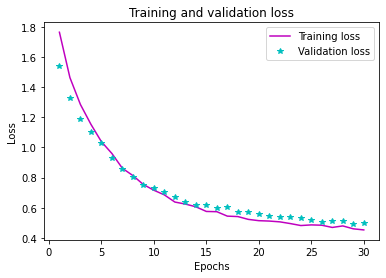

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss'] #definir variavel de perda para dados de treino (valor utilizado para eixo do y nos dados de treino)
val_loss = history.history['val_loss'] #definir variavel de perda para dados de teste (valor utilizado para eixo do y nos dados de teste)
epochs=range(1, len(loss) +1) #definir valor utilizado para eixo do x nos dados de treino e teste 

plt.plot(epochs, loss, 'm', label='Training loss') #definir os valores de x=epocas e y=valor de loss do treino, ('m')= linha rosa, ('Training loss')=legenda
plt.plot(epochs, val_loss, 'c*', label='Validation loss')  #definir os valores de x=epocas e y=valor de loss do teste, ('c*')= estrelinhas azuis, ('Validation loss')=legenda
plt.title('Training and validation loss') #definir titulo do grafico
plt.xlabel('Epochs') #definir titulo do eixo do x
plt.ylabel('Loss') #definir titulo do eixo do y
plt.legend() 

plt.show() 


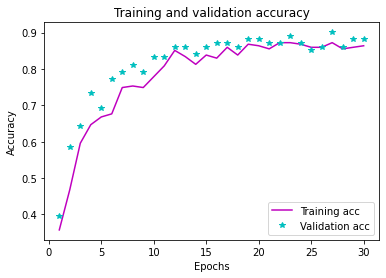

In [16]:
acc=history.history['accuracy'] #definir variavel de precisão para dados de treino (valor utilizado para eixo do y nos dados de treino)
val_acc=history.history['val_accuracy'] #definir variavel de precisão para dados de teste (valor utilizado para eixo do y nos dados de teste)

plt.plot(epochs, acc, 'm', label='Training acc') #definir os valores de x=epocas e y=valor de precisão do treino, ('m')= linha rosa, ('Training acc')=legenda
plt.plot(epochs, val_acc, 'c*', label='Validation acc') #definir os valores de x=epocas e y=valor de precisão do teste, ('c*')= extrelinhas azuis, ('Validation acc')=legenda
plt.title('Training and validation accuracy') #definir titulo do grafio
plt.xlabel('Epochs')  #definir titulo do eixo do x
plt.ylabel('Accuracy') #definir titulo do eixo do y
plt.legend()

plt.show()

# Tentativas

In [18]:
#from keras import models
#from keras import layers
#model=models.Sequential()
#model.add(layers.Dense(1000,input_dim=7,activation='relu'))
#model.add(Dropout(0.2))
#model.add(layers.Dense(500,activation='relu'))
#model.add(Dropout(0.2))
#model.add(layers.Dense(8,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#history=model.fit(methods_train, localization_train,v validation_data=(methods_test,localization_test), batch_size=20, epochs=20,verbose=)

Dropout(0.2)

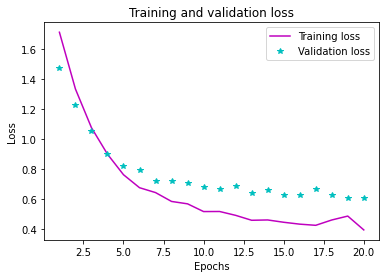

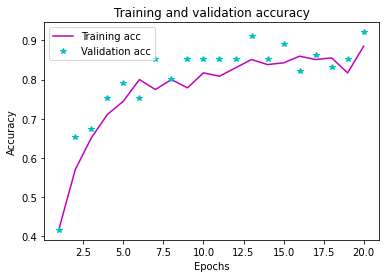

In [19]:
#from keras import models
#from keras import layers
#model=models.Sequential()
#model.add(layers.Dense(1000,input_dim=7,activation='relu'))
#model.add(layers.Dense(500,activation='relu'))
#model.add(layers.Dense(8,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

#history=model.fit(methods_train, localization_train,v validation_data=(methods_test,localization_test), batch_size=20, epochs=20,verbose=2)

3 camadas 

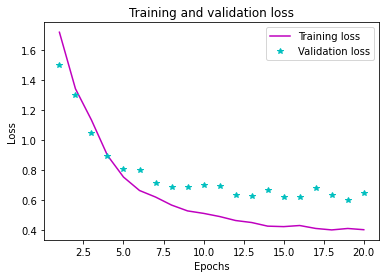


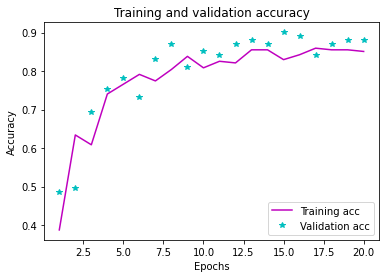

In [20]:
#from keras import models
#from keras import layers
#model=models.Sequential()
#model.add(layers.Dense(1000,input_dim=7,activation='relu'))
#model.add(layers.Dense(500,activation='relu'))
#model.add(layers.Dense(300,activation='relu'))
#model.add(layers.Dense(8,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

#history=model.fit(methods_train, localization_train,v validation_data=(methods_test,localization_test), batch_size=20, epochs=20,verbose=)

4 camadas


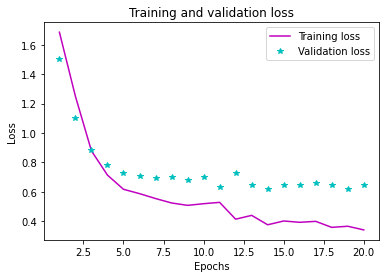


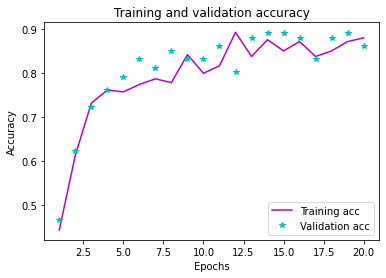





# K-fold

In [21]:
#def build_model():
#  model=models.Sequential()
#  model.add(layers.Dense(1000, input_dim=7,activation='relu')) #1000 percetrons na primeira camada, 7 metodos/analises diferentes, função de ativação: relu
#  model.add(Dropout(0.15)) #15% dos valores passam a ter o valor 0
#  model.add(layers.Dense(1000,  activation='relu')) #1000 percetrons na segunda camada, função de ativação: relu
#  model.add(Dropout(0.15))  #15% dos valores passam a ter o valor 0
#  model.add(layers.Dense(8,activation='softmax')) #8 percetrons na ultima camada, função de ativação: softmax
#  model.compile(loss='categorical_crossentropy',optimizer= 'Adamax' ,metrics=['accuracy']) #compilar o modelo da rede, definindo a função de loss, o otimizador e a metrica.
#  return model
 


#k = 5
#num_val_samples = len(methods_train) // k
#num_epochs = 100
#all_scores = []
#for i in range(k):
#    print(f"Processing fold #{i}")
#    val_data = methods_train[i * num_val_samples: (i + 1) * num_val_samples]
#    val_targets = localization_train[i * num_val_samples: (i + 1) * num_val_samples]
#    partial_train_data = np.concatenate(
#        [methods_train[:i * num_val_samples],
#         methods_train[(i + 1) * num_val_samples:]],
#        axis=0)
#    partial_train_targets = np.concatenate(
#        [localization_train[:i * num_val_samples],
#         localization_train[(i + 1) * num_val_samples:]],
#        axis=0)
#    model = build_model()
#    history=model.fit(partial_train_data, 
#                       partial_train_targets,
#                       validation_data=(methods_test,localization_test),
#                       epochs=num_epochs, 
#                       batch_size=16, 
#                       verbose=2)
    
    

    


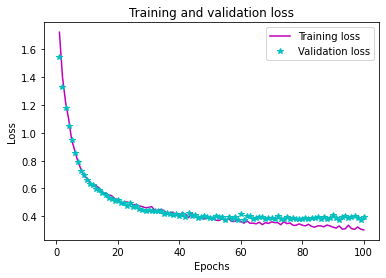



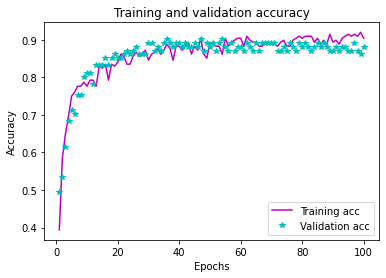